# Analyse de l'incidence de la varicelle

In [1]:
# common imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1990 et se termine avec une semaine récente.

In [2]:
data_url ="http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Si le fichier utilisé disparaît du serveur du Réseau Sentinelles, cela peut-être dangereux pour notre étude. Nous faisons donc une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risqué de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [3]:
data_file = "/home/jovyan/work/module3/exo2/incidence-PAY-7.csv"

import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [4]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202013          7   7371     5268    9474      11           8   
1     202012          7   8123     5790   10456      12           8   
2     202011          7  10198     7568   12828      15          11   
3     202010          7   9011     6691   11331      14          10   
4     202009          7  13631    10544   16718      21          16   
5     202008          7  10424     7708   13140      16          12   
6     202007          7   8959     6574   11344      14          10   
7     202006          7   9264     6925   11603      14          10   
8     202005          7   8505     6314   10696      13          10   
9     202004          7   7991     5831   10151      12           9   
10    202003          7   5968     4100    7836       9           6   
11    202002          7   6534     4530    8538      10           7   
12    202001          7   9835     7019   12651      15          11   
13    201952          7   7941     5246   10636      12           8   
14    201951          7   5823     3675    7971       9           6   
15    201950          7   6424     4276    8572      10           7   
16    201949          7   6621     4540    8702      10           7   
17    201948          7   5542     3383    7701       8           5   
18    201947          7   7536     5058   10014      11           7   
19    201946          7   2638     1316    3960       4           2   
20    201945          7   4492     2615    6369       7           4   
21    201944          7   5728     3627    7829       9           6   
22    201943          7   4834     2751    6917       7           4   
23    201942          7   6279     3989    8569      10           7   
24    201941          7   4130     2030    6230       6           3   
25    201940          7   4211     2218    6204       6           3   
26    201939          7   3137     1310    4964       5           2   
27    201938          7   3078     1416    4740       5           2   
28    201937          7    970      162    1778       1           0   
29    201936          7   1277      263    2291       2           0   
...      ...        ...    ...      ...     ...     ...         ...   
1500  199126          7  17608    11304   23912      31          20   
1501  199125          7  16169    10700   21638      28          18   
1502  199124          7  16171    10071   22271      28          17   
1503  199123          7  11947     7671   16223      21          13   
1504  199122          7  15452     9953   20951      27          17   
1505  199121          7  14903     8975   20831      26          16   
1506  199120          7  19053    12742   25364      34          23   
1507  199119          7  16739    11246   22232      29          19   
1508  199118          7  21385    13882   28888      38          25   
1509  199117          7  13462     8877   18047      24          16   
1510  199116          7  14857    10068   19646      26          18   
1511  199115          7  13975     9781   18169      25          18   
1512  199114          7  12265     7684   16846      22          14   
1513  199113          7   9567     6041   13093      17          11   
1514  199112          7  10864     7331   14397      19          13   
1515  199111          7  15574    11184   19964      27          19   
1516  199110          7  16643    11372   21914      29          20   
1517  199109          7  13741     8780   18702      24          15   
1518  199108          7  13289     8813   17765      23          15   
1519  199107          7  12337     8077   16597      22          15   
1520  199106          7  10877     7013   14741      19          12   
1521  199105          7  10442     6544   14340      18          11   
1522  199104          7   7913     4563   11263      14           8   
1523  199103          7  15387    10484   20290      27          18   
1524  199102          7  16277  

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il n'y a pas de données manquantes a priori. On utilise les données telles quelles

In [6]:
data = raw_data

Les données ont un format inabituel, qu'il convient de convertir

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year=int(year_and_week_str[:4])
    week=int(year_and_week_str[4:])
    w=isoweek.Week(year,week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il rest deux petites modifications à faire : 

- Définir les périodes d'observation comme nouvel index de notre jeu de données
- Trier les points chronologiquement

In [8]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Il n'y a aucune semaine manquante.

Regardons les données :

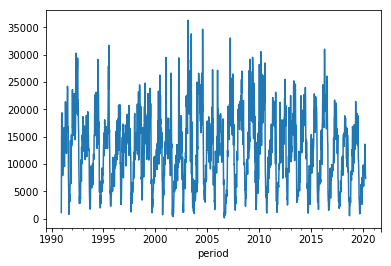

In [10]:
sorted_data['inc'].plot()

Un zoom sur les dernières années permet de mieux comment sont répartis les pics épidémiques, qui semblent les plus faibles.

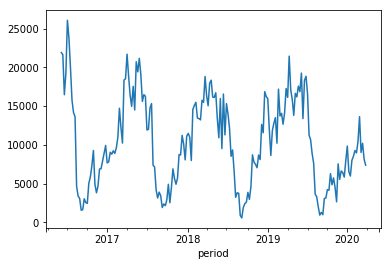

In [11]:
sorted_data['inc'][-200:].plot()

On regarde l'année 2019, sachant qu'on se situe en semaine 13

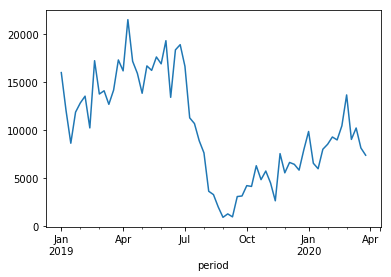

In [12]:
sorted_data['inc'][-65:].plot()

La maladie semble progresser de septembre à juillet pour décroître drastiquement pendant l'été.

## Etude de l'incidence annuelle

Nous définissons la période de référence entre deux minima de l'incidence, du 1er septembre de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de la varicelle est faible en août, cela risque moins de fausser notre analyse

Encore un petit détail: les données commencent en novembre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [13]:
first_august_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [14]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles

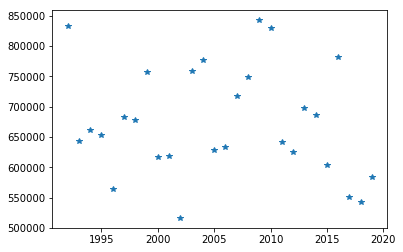

In [15]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [16]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre bien qu'il y a surtout des épidémies faibles à moyennes : 90 % des épidémies touchent moins de 1 % de la population.

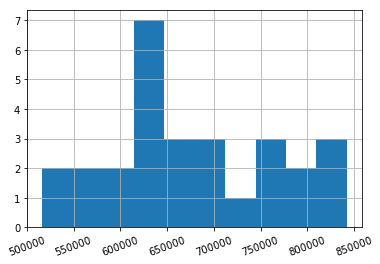

In [17]:
yearly_incidence.hist(xrot=20)

In [18]:
850000/(67*10**6)*100

1.2686567164179103